<a href="https://colab.research.google.com/github/s-mushnoori/lending-club/blob/main/lending_club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

# 1. Import Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_data = "/content/drive/MyDrive/Colab Notebooks/Data/lending-club/lending_club_loan.csv"
path_desc = "/content/drive/MyDrive/Colab Notebooks/Data/lending-club/lending_club_info.csv"

In [4]:
df = pd.read_csv(path_data)
data_desc  = pd.read_csv(path_desc)

pd.options.display.max_colwidth = 1000
data_desc

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## 1.1 Data overview

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# 2. Exploratory Data Analysis

The column 'loan_status' looks to be the output column. From the plot below, we can see that the dataset is not balanced. We should take this into account during the test train split

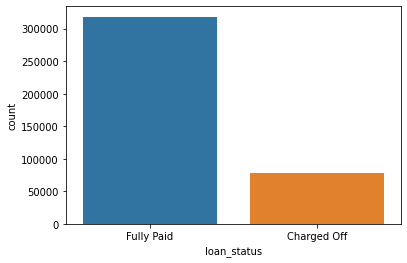

In [8]:
sns.countplot(x='loan_status', data=df)

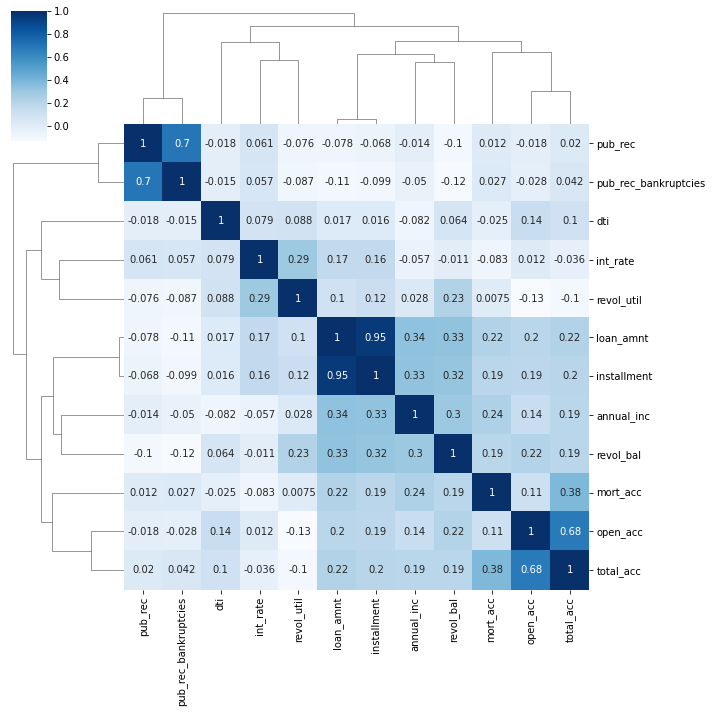

In [9]:
sns.clustermap(df.corr(), 
               annot=True, 
               cmap='Blues')

#### Investigate features:

The feature 'installment' is very highly correlated with 'loan_amnt'.

Text(0, 0.5, 'installment')

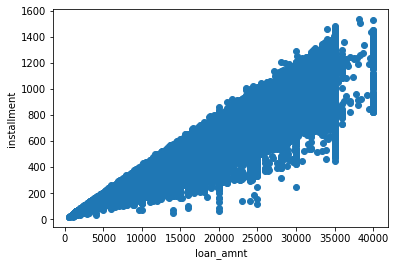

In [10]:
plt.scatter(df.loan_amnt, df.installment)
plt.xlabel('loan_amnt')
plt.ylabel('installment')

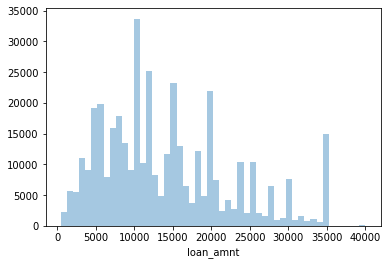

In [11]:
sns.distplot(df.loan_amnt,  kde=False)

Loans that are charged off (given up on) tend to be those with higher interest rates

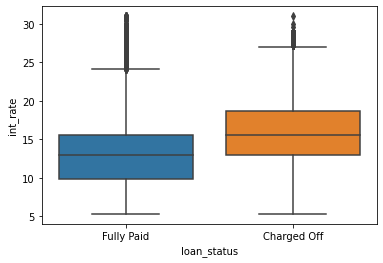

In [12]:
sns.boxplot(x='loan_status', y='int_rate', data=df)

Looks like the grades and subgrades are assigned based on how likely the borrower is to pay off the loan.
Grades F and G are about 50% likely to fully pay off the loan.
Subgrades further shed light onto this. 
But grades and subgrades repeat information. Maybe these can be dropped

In [13]:
print(df.grade.unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [14]:
print(sorted(df.sub_grade.unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


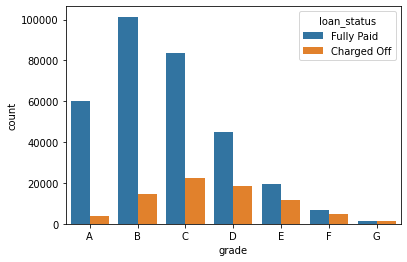

In [15]:
sns.countplot(x='grade', data=df, hue='loan_status', order=sorted(df['grade'].unique()))

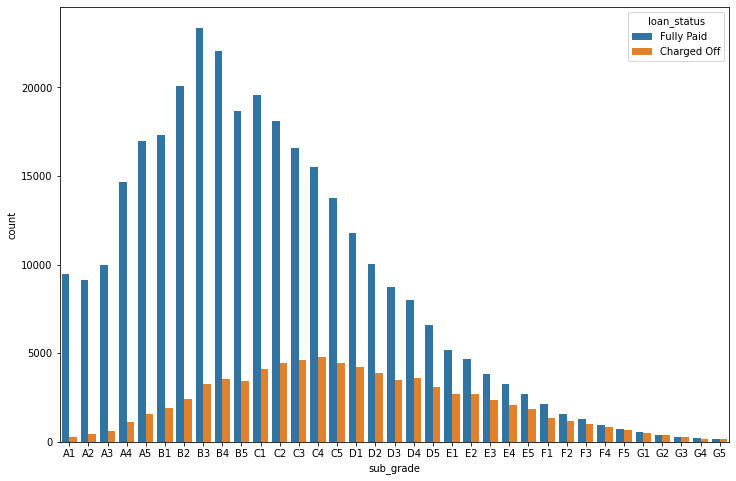

In [16]:
plt.figure(figsize = (12,8))
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sorted(df['sub_grade'].unique()))

There are no clear or obvious correlations between 'home_ownership' and 'loan_status'.

In [17]:
print(df.emp_length.unique())

['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


In [18]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

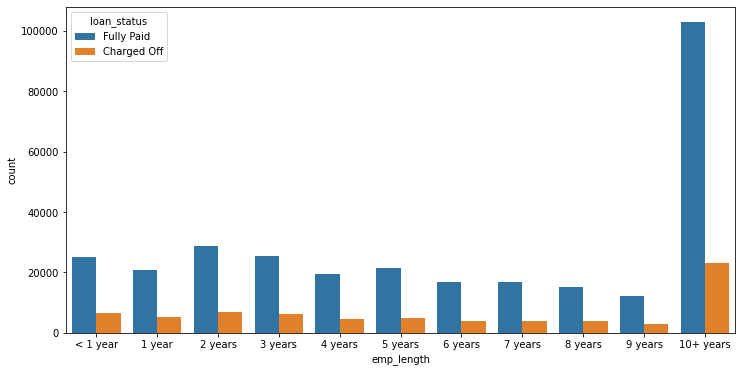

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df, hue='loan_status', order = emp_length_order)

There may be some stronger correlation between 'home_ownership' and 'loan_status'.

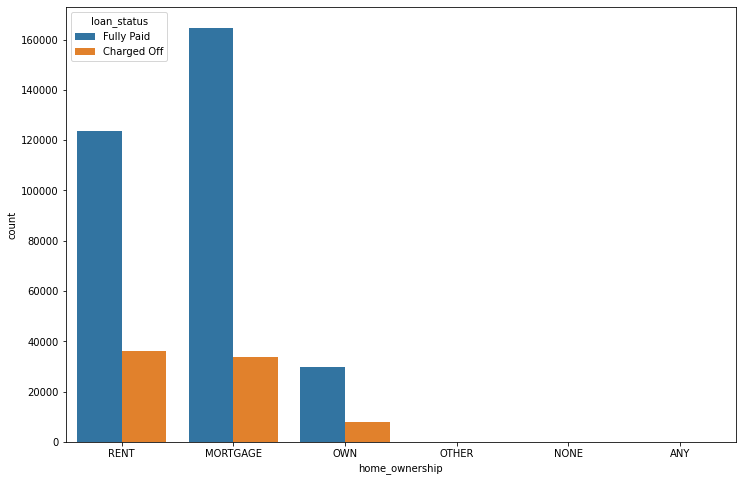

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x='home_ownership', data=df, hue='loan_status')

# 3. Data Preprocessing

## 3.1 Create Output Variable

Make the output column. Make a coimn named 'loan_paid' with values 1 if 'loan_status' is fully paid, and 0 if charged off.

'loan_status' has no null values from what we saw above. 

In [21]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [22]:
def create_output(data):
    data['loan_paid'] = data['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
    data.drop('loan_status', axis = 1, inplace=True)

In [23]:
create_output(df)

Now, observe correlations of these features with the new output column

- Interest rate is the most strongly related to the loan being charged off

In [24]:
df.corr()['loan_paid'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_paid               1.000000
Name: loan_paid, dtype: float64

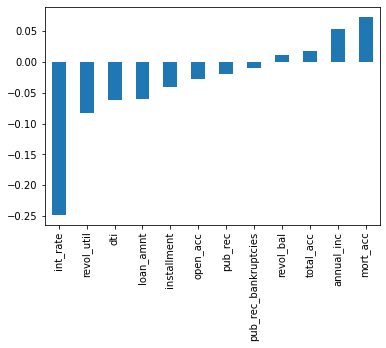

In [25]:
df.corr()['loan_paid'].sort_values().drop('loan_paid').plot(kind='bar')

## 3.2 Missing Data

Explore all features with missing data and figure out how to deal with it. Then define a function that takes in a dataset and does the cleaning.

Some  questions to  consider:
- For the features with missing info, what percentage of rows have missing data? 
    - 'mort_acc' has the maximum amount of missing data: Rougly 10% of the data is missing
    - 'emp_title' and 'emp_length' have about 6% and 5% missing data
    - 'title', 'revol_util', and 'pub_rec_backruptcies' has <1% data missing
- Would it significantly affect the dataset if these rows were dropped instead of imputing the values?

In [26]:
# What percentage of each columns is missing?

df.isnull().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_paid               0.000000
dtype: float64

In [27]:
# Define function to get the description of the feature from data_desc

def feat_info(col_name):
    return data_desc[data_desc['LoanStatNew'] == col_name][['LoanStatNew','Description']]

### 3.2.1 'emp_title': 

There are too many employee titles to derive any meaningful information to impute values during feature engineering. 

Makes sense to drop this column instead of dropping rows or imputing values.

In [28]:
feat_info('emp_title')

,LoanStatNew,Description
6,emp_title,The job title supplied by the Borrower when applying for the loan.*


In [29]:
df['emp_title'].nunique()

173105

In [30]:
df['emp_title'].value_counts()

Teacher                             4389
Manager                             4250
Registered Nurse                    1856
RN                                  1846
Supervisor                          1830
                                    ... 
V.P. of Manufacturing                  1
Washington Education Association       1
certified ophthalmic technician        1
Perry Ellis International              1
legal supervisor                       1
Name: emp_title, Length: 173105, dtype: int64

### 3.2.2 **'emp_length':** 

The majority of people have been employed for more than 10 years. 

We could either fill in the missing values with the mean employment length or 10+ (the mode). 

- But  first we ask ourselves, is the employment length a strong indicator of the loan being fully paid?
    - From the plot above, it doesn't look like there is a large difference in the percentage of people who pay off the loan based on length of emplotment. The plot below confirms this. 
    
Drop this column

In [31]:
feat_info('emp_length')

,LoanStatNew,Description
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


In [32]:
df.emp_length.value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

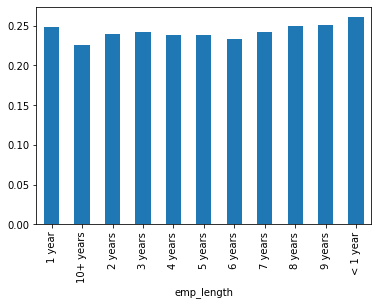

In [33]:
paid_by_emplength = df[df['loan_paid']  == 1].groupby('emp_length').count()['loan_paid']
not_paid_by_emplength = df[df['loan_paid']  == 0].groupby('emp_length').count()['loan_paid']

by_emplength = not_paid_by_emplength / paid_by_emplength

by_emplength.plot(kind='bar')

### 3.2.3 **'title':** 

There are too many titles to impute values. There are also too many values to encode them. Further this  column is the same as the 'purpose' column.

Drop this column instead of dropping rows.

In [34]:
feat_info('title')

,LoanStatNew,Description
14,title,The loan title provided by the borrower


In [35]:
df.title.nunique()

48817

### 3.2.4 'revol_util':

Since only 0.7% of the values in the column are missing, we can drop these rows.

###  3.2.5 'mort_acc':

There are many ways to fill in the null values for this column. For this project, I will simply fill it with the mean of the training set values for 'mort_acc'

Note: A better way may be to fill it based on the values of another column. To do this, we find the correlation of columns with 'mort_acc', and see if there are any features that correlate with it.


In [36]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [37]:
feat_info('mort_acc')

,LoanStatNew,Description
26,mort_acc,Number of mortgage accounts.


### 3.2.6 'pub_rec_bankruptcies':

Only 1.3% of these values are  missing, so we can again go ahead and drop these rows. 

In [38]:
# Define function to clean data

def clean_data(dataset):
    
    data_cleaned = dataset
    
    
    # These columns will be dropped altogether
    
    columns_to_drop = [
        'emp_title',
        'emp_length',
        'title']

    data_cleaned.drop(columns_to_drop, axis=1, inplace=True)

    
    # For 'mort_acc', we will impute the mean of the values
    
    mort_acc_mean = round(dataset['mort_acc'].mean())
    
    data_cleaned['mort_acc'].fillna(mort_acc_mean, inplace=True)
    
    # Now we can drop rows of 'revol_util' and 'pub_rec_bankruptcies'
    
    data_cleaned.dropna(inplace=True)
    
    return data_cleaned
    

In [39]:
df = clean_data(df)

In [40]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_paid               0
dtype: int64

## 3.3 Categorical Variables

Now to deal with cattegorical variables. Look at all the features with data type 'object' and see how to deal with them. Either drop the column if it doesn't seem to impact the output variable much, or encode them.

In [41]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### 3.3.1 'term': 

This feature has values 36 or 60 months (as strings). We can one hot encode this as '36' and 'not 36', but a longer time to pay off the loan may be important information. So we will just grab the values, convert to int and leave them there. 

In [42]:
df.term.value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

### 3.3.2 'grade'    and    'sub_grade':

These features essentially have the same information, and sub_grade is more granular. We can drop 'grade' and encode 'sub_grade'

In [43]:
feat_info('grade')

,LoanStatNew,Description
4,grade,LC assigned loan grade


In [44]:
feat_info('sub_grade')

,LoanStatNew,Description
5,sub_grade,LC assigned loan subgrade


### 3.3.3 'home_ownership':

Replace 'NONE' and 'ANY' with 'OTHER' so we have only 4 new features after encoding

In [45]:
feat_info('home_ownership')

,LoanStatNew,Description
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [46]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

### 3.3.4 'verification_status':

Encode this feature, no modifications required

In [47]:
feat_info('verification_status')

,LoanStatNew,Description
10,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"


In [48]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

### 3.3.5 'issue_d':

This column needs to be dropped. When evaluating a new customer, we wouldn't know if the loan is issued or not. The purpose of the  project is to look at a new customer and  decide whether or not to issue a loan based on their likelihood of loan repayment. 

In [49]:
feat_info('issue_d')

,LoanStatNew,Description
11,issue_d,The month which the loan was funded


### 3.3.6 'purpose':

Encode this feature, no modifications required

In [50]:
feat_info('purpose')

,LoanStatNew,Description
13,purpose,A category provided by the borrower for the loan request.


In [51]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

### 3.3.7 'earliest_cr_line':

The month here isn't of much importance. It makes sense to extract the year from  this feature, make a new feature 'earliest_cr_year', and drop the original feature. This feature will NOT be encoded

In [52]:
feat_info('earliest_cr_line')

,LoanStatNew,Description
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened


In [53]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jun-1955       1
Sep-1961       1
Jul-1962       1
Jan-1957       1
Feb-1961       1
Name: earliest_cr_line, Length: 684, dtype: int64

### 3.3.8 'initial_list_status':

Encode this feature, no modifications required

In [54]:
feat_info('initial_list_status')

,LoanStatNew,Description
24,initial_list_status,"The initial listing status of the loan. Possible values are – W, F"


In [55]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

### 3.3.9 'application_type':

Encode this feature, no modifications required

In [56]:
feat_info('application_type')

,LoanStatNew,Description
25,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [57]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

### 3.3.10 'address':

Zipcode can be a useful feature here. However, realistically, there can be a very  large number of zipcodes,  and without encoding, this information isn't useful. If this data was from  just one state, we could have encoded the zipcode. In this case, just extract the zipcode and leave it as is without encoding. 

In [58]:
df['address'].head(10)

0                 0174 Michelle Gateway\r\nMendozaberg, OK 22690
1              1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2              87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                        823 Reid Ford\r\nDelacruzside, MA 00813
4                         679 Luna Roads\r\nGreggshire, VA 11650
5    1726 Cooper Passage Suite 129\r\nNorth Deniseberg, DE 30723
6         1008 Erika Vista Suite 748\r\nEast Stephanie, TX 22690
7                                    USCGC Nunez\r\nFPO AE 30723
8                                     USCGC Tran\r\nFPO AP 22690
9                         3390 Luis Rue\r\nMauricestad, VA 00813
Name: address, dtype: object

### 3.3.11 Modify categorical variables

In [59]:
def engineer_features(dataset):
    
    #Modify or engineer features
    
    
    dataset['term'] = dataset['term'].apply(lambda term: int(term[:3]))
    
    dataset['home_ownership']= dataset['home_ownership'].replace(to_replace=['NONE', 'ANY'], value='OTHER')
    
    dataset['earliest_cr_year'] = dataset['earliest_cr_line'].apply(lambda year: int(year[-4:]))

    dataset['zip'] = dataset['address'].apply(lambda zipcode: int(zipcode[-6:]))
    
    
    # Drop columns
    
    
    columns_to_drop = [
        'grade',
        'issue_d',
        'earliest_cr_line',
        'address']
        
    dataset.drop(columns_to_drop, axis=1, inplace=True)
    
    
    # Create dummy variables and concatenate to the dataset
    
    
    columns_to_dummy = [
        'sub_grade',
        'home_ownership',
        'verification_status',
        'purpose',
        'initial_list_status',
        'application_type',
    ]
    
    dummies = pd.get_dummies(dataset[columns_to_dummy], drop_first=True)
    dataset = pd.concat([dataset,dummies], axis=1)
    dataset.drop(columns_to_dummy, axis=1, inplace=True)
    
    
    return dataset

In [60]:
df = engineer_features(df)

In [61]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_paid', 'earliest_cr_year',
       'zip', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'pu

In [62]:
df.head(10)

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_paid,earliest_cr_year,zip,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,1990,22690,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,2004,5113,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,2007,5113,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,2006,813,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,1999,11650,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,20000.0,36,13.33,677.07,86788.0,16.31,8.0,0.0,25757.0,100.6,23.0,4.0,0.0,1,2005,30723,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,18000.0,36,5.32,542.07,125000.0,1.36,8.0,0.0,4178.0,4.9,25.0,3.0,0.0,1,2005,22690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7,13000.0,36,11.14,426.47,46000.0,26.87,11.0,0.0,13425.0,64.5,15.0,0.0,0.0,1,1994,30723,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,18900.0,60,10.99,410.84,103000.0,12.52,13.0,0.0,18637.0,32.9,40.0,3.0,0.0,1,1994,22690,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
9,26300.0,36,16.29,928.40,115000.0,23.69,13.0,0.0,22171.0,82.4,37.0,1.0,0.0,1,1997,813,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# 4. Predictive Modeling

## 4.1 Train-test split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.drop('loan_paid', axis=1)
y = df['loan_paid']

In [65]:
X.shape

(395219, 70)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## 4.2 Normalize the data

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4.3 Create the model

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [70]:
model = Sequential()

In [71]:
# Input layer
model.add(Dense(69,  activation='relu'))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(35, activation='relu'))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(17, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [72]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.4163 - val_loss: 0.3694
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3714 - val_loss: 0.3619
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3653 - val_loss: 0.3580
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3430 - val_loss: 0.3001
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2965 - val_loss: 0.2818
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2864 - val_loss: 0.2808
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2847 - val_loss: 0.2799
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2833 - val_loss: 0.2793
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2817 - val_loss: 0.2792
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.281

## 4.4 Evaluate model performance

In [73]:
losses = pd.DataFrame(model.history.history)

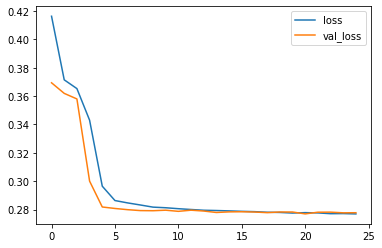

In [74]:
losses[['loss','val_loss']].plot()

In [75]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [76]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15505
           1       0.88      1.00      0.93     63539

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [78]:
confusion_matrix(y_test,y_pred)

array([[ 6613,  8892],
       [    6, 63533]])